In [1]:
import os
os.chdir('/scratch/sagarsj42')

In [2]:
import time
import pickle
import multiprocessing

import numpy as np
import scipy.spatial as sp
import gensim

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [39]:
with open('svd_vocab_checked.pkl', 'rb') as f:
    vocab = pickle.load(f)

len(vocab)

50932

In [6]:
u = np.load('u.npy')
s = np.load('s.npy')
u.shape, s.shape

((50932, 750), (750,))

In [13]:
e = u * s
e.shape

(50932, 750)

In [14]:
i = vocab.index('camera')
w1_e = e[i]
w1_e.shape

(750,)

In [15]:
distances = list()
for i in range(50932):
    w2_e = e[i]
    distances.append((sp.distance.cosine(w1_e, w2_e), vocab[i]))
    
distances[:10]

[(0.8059779601384243, 'we'),
 (0.7482707510874747, 'got'),
 (0.646453006020335, 'this'),
 (0.6629346888967802, 'for'),
 (0.7121355381247378, 'my'),
 (0.7106138454211817, 'husband'),
 (0.7780106761984138, 'who'),
 (0.6314838049685192, 'is'),
 (0.7906894644377964, 'an'),
 (0.7118039839067032, 'over')]

In [16]:
distances.sort(key=lambda t: t[0])
distances[:11]

[(0.0, 'camera'),
 (0.19719566991147985, 'afloat'),
 (0.19860585020830512, 'glazer'),
 (0.227132303353194, 'paddy'),
 (0.2622693856612147, 'chums'),
 (0.2695240230903264, 'subcompact'),
 (0.27016883199141495, 'steadying'),
 (0.2726854541436079, 'wolf'),
 (0.2764312724655691, 'bobbled'),
 (0.2785128479018991, 'shake'),
 (0.29210020381534374, 'body')]

In [10]:
word2vec = gensim.models.KeyedVectors.load_word2vec_format(
    '~/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz', binary=True)

w1_e = word2vec['camera']
w1_e.shape

(300,)

In [11]:
distances = list()
for word in vocab:
    try:
        w2_e = word2vec[word]
    except KeyError:
        w2e = np.zeros(300)
    distances.append((sp.distance.cosine(w1_e, w2_e), word))
    
distances[:10]

[(0.9034783244132996, 'we'),
 (0.8751401305198669, 'got'),
 (0.9668513834476471, 'this'),
 (1.0030541874002665, 'for'),
 (0.8633989840745926, 'my'),
 (0.8664259761571884, 'husband'),
 (0.9332376345992088, 'who'),
 (0.9353648945689201, 'is'),
 (0.9466216117143631, 'an'),
 (0.9986811223207042, 'over')]

In [12]:
distances.sort(key=lambda t: t[0])
distances[:11]

[(0.0, 'camera'),
 (0.18680614233016968, 'cameras'),
 (0.29625242948532104, 'camcorder'),
 (0.3810161352157593, 'tripod'),
 (0.403339147567749, 'viewfinder'),
 (0.42922067642211914, 'projector'),
 (0.4313773512840271, 'flashguns'),
 (0.4367401599884033, 'camcorders'),
 (0.4489501714706421, 'microphone'),
 (0.45192039012908936, 'lens'),
 (0.45716017484664917, 'cam')]

In [17]:
e_pca = PCA(n_components=10).fit_transform(e)
e_pca.shape

(50932, 10)

In [18]:
e_tsne = TSNE(n_components=2, perplexity=20, 
              metric='euclidean', init='pca', square_distances=True,
              n_jobs=multiprocessing.cpu_count()).fit_transform(e_pca)
e_tsne.shape

(50932, 2)

In [19]:
select_words = ['jackhammered', 'sharper', 'amid', 'secretion', 'chapeau']
select_ind = [vocab.index(word) for word in select_words]
word_embeds = [e_tsne[i] for i in select_ind]
select_ind

[50396, 4402, 23401, 40099, 35583]

In [22]:
word_distances = dict()

for w, w1_e in zip(select_words, word_embeds):
    distances = list()
    for i in range(50932):
        if vocab.index(w) != i:
            w2_e = e_tsne[i]
            distances.append((vocab[i], w2_e, sp.distance.cosine(w1_e, w2_e)))
    
    distances.sort(key=lambda t: t[2])
    word_distances[w] = (w1_e, distances[:10])

word_distances

{'jackhammered': (array([-1961.9064,   588.1174], dtype=float32),
  [('stupidly', array([-1730.1117,   519.0841], dtype=float32), 0.0),
   ('elderly', array([-1681.6763 ,   503.39157], dtype=float32), 0.0),
   ('helping', array([-1063.8298 ,   319.18845], dtype=float32), 0.0),
   ('alike', array([-1573.9802 ,   472.28177], dtype=float32), 0.0),
   ('presto', array([-1573.9766 ,   472.28384], dtype=float32), 0.0),
   ('travelers', array([-1681.7163 ,   503.49158], dtype=float32), 0.0),
   ('whatnot', array([-1573.9735 ,   472.28036], dtype=float32), 0.0),
   ('predict', array([-1730.2878,   518.9207], dtype=float32), 0.0),
   ('teleconference', array([-1852.5658,   554.5256], dtype=float32), 0.0),
   ('sergeant', array([-1904.5425,   571.6138], dtype=float32), 0.0)]),
 'sharper': (array([211.37173, 175.86638], dtype=float32),
  [('width', array([1724.3816, 1435.2638], dtype=float32), 0.0),
   ('tightly',
    array([576.0537, 478.7985], dtype=float32),
    5.960464477539063e-08),
   ('lo

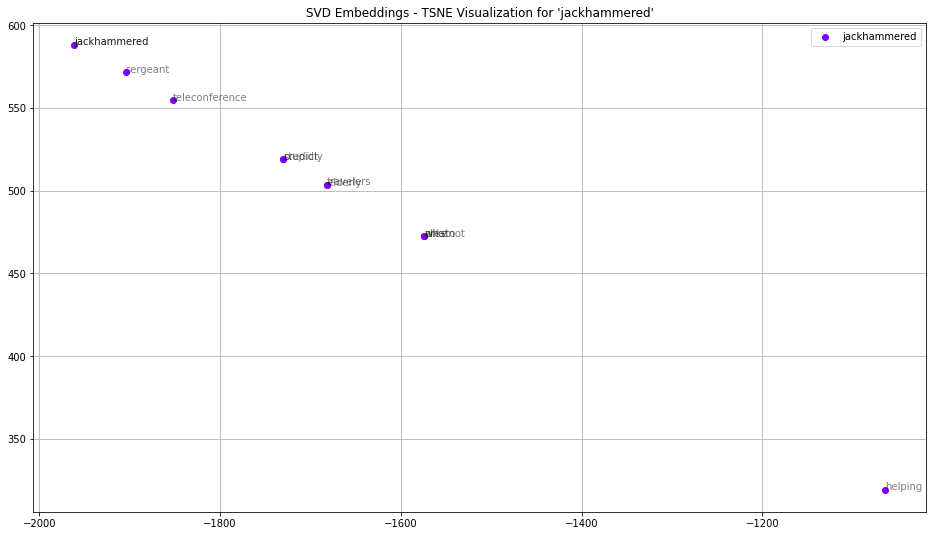

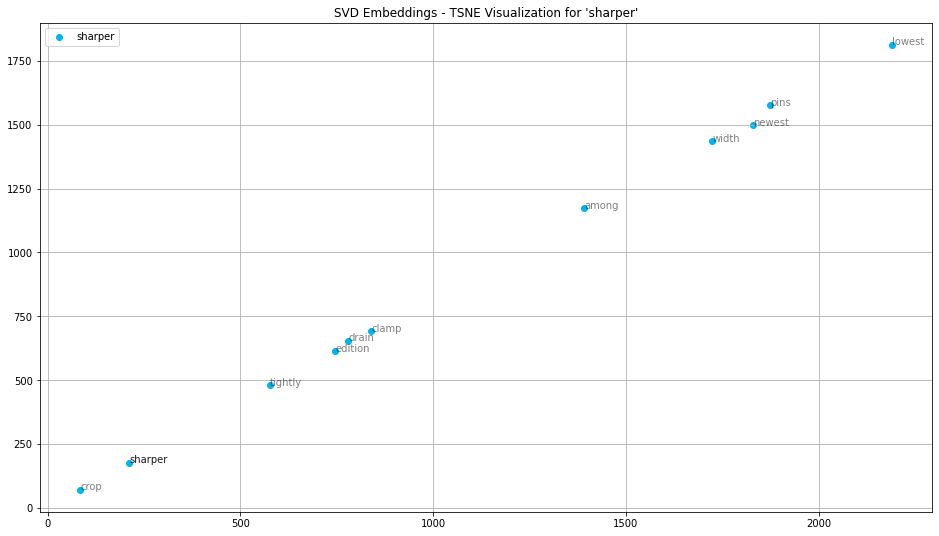

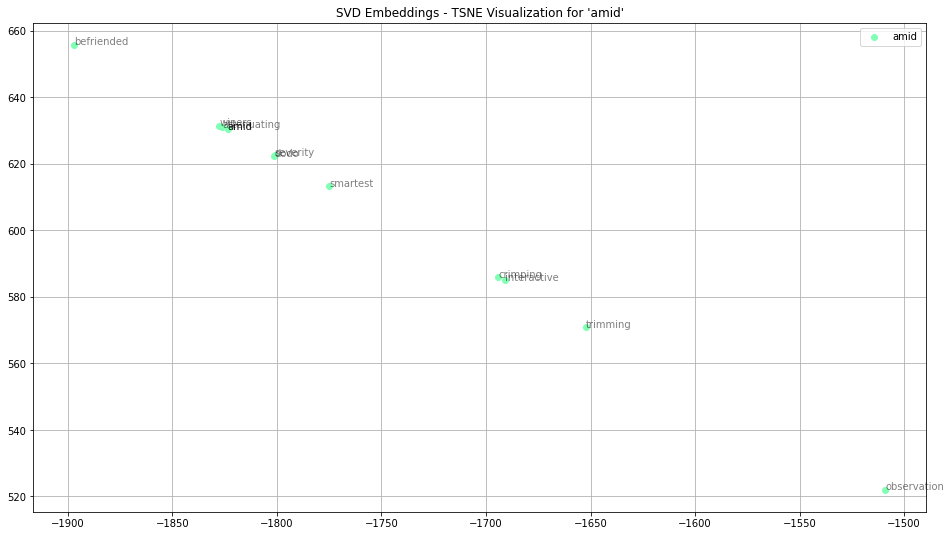

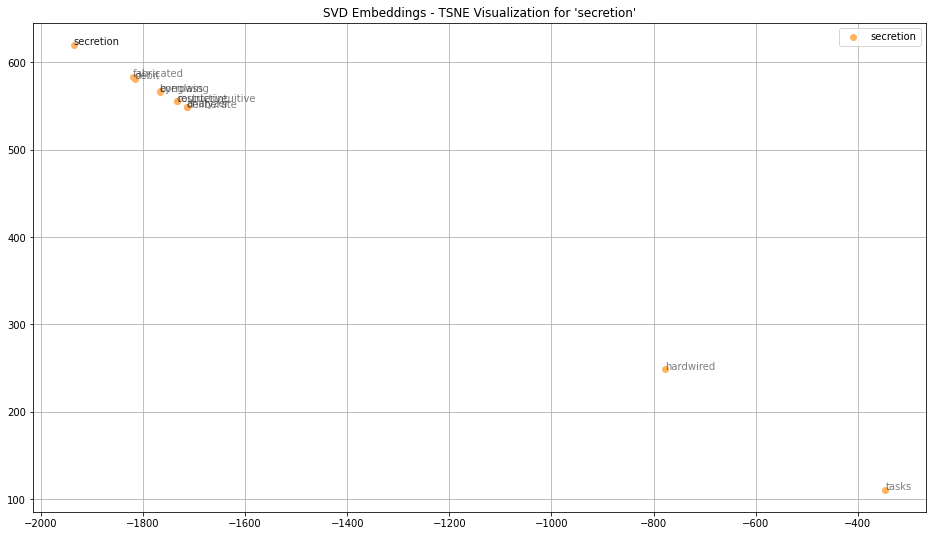

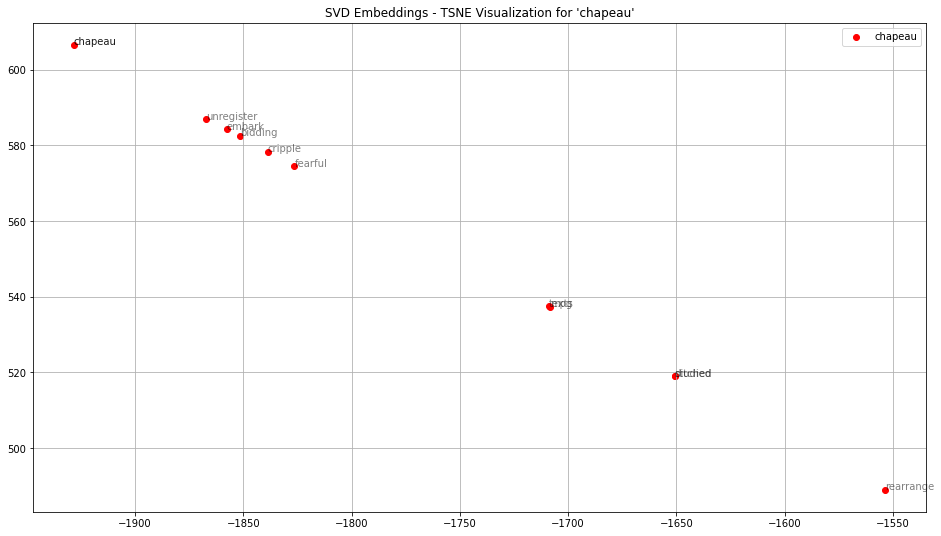

In [23]:
colors = cm.rainbow(np.linspace(0, 1, 5))

for word, color in zip(word_distances, colors):
    plt.figure(figsize=(16, 9))
    w1_e = word_distances[word][0]
    distances = word_distances[word][1]
    x = w1_e[0]
    y = w1_e[1]
    
    plt.scatter(x, y, label=word, color=color)
    plt.annotate(word, alpha=0.9, xy=(x, y))
    
    for d in distances:
        word2 = d[0]
        w2_e = d[1]
        x = w2_e[0]
        y = w2_e[1]
        
        plt.scatter(x, y, color=color)
        plt.annotate(word2, alpha=0.5, xy=(x, y))
    
    plt.title('SVD Embeddings - TSNE Visualization for \'' + word + '\'')
    plt.legend()
    plt.grid()
    plt.savefig('svd-'+word+'.png')
    plt.show()

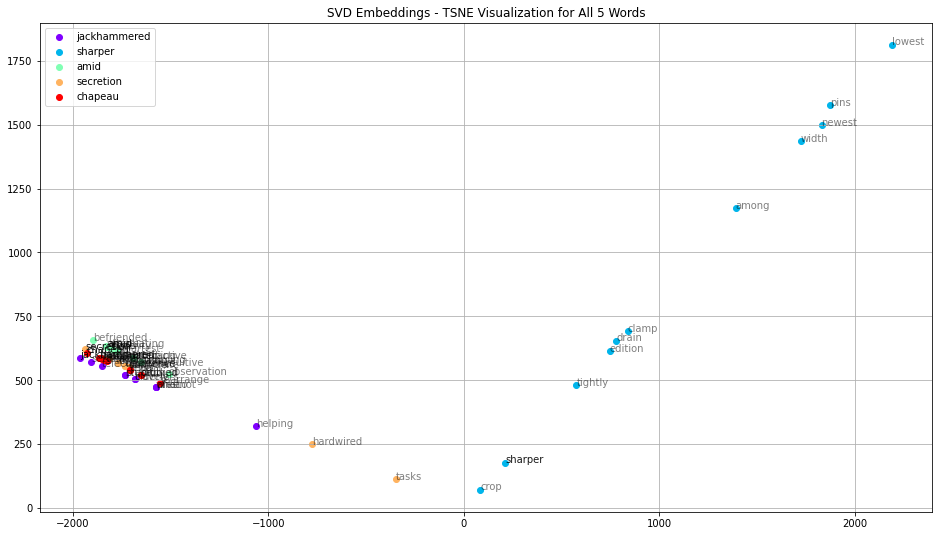

In [37]:
colors = cm.rainbow(np.linspace(0, 1, 5))
plt.figure(figsize=(16, 9))

for word, color in zip(word_distances, colors):
    w1_e = word_distances[word][0]
    distances = word_distances[word][1]
    x = w1_e[0]
    y = w1_e[1]
    
    plt.scatter(x, y, label=word, color=color)
    plt.annotate(word, alpha=0.9, xy=(x, y))
    
    for d in distances:
        word2 = d[0]
        w2_e = d[1]
        x = w2_e[0]
        y = w2_e[1]
        
        plt.scatter(x, y, color=color)
        plt.annotate(word2, alpha=0.5, xy=(x, y))
    
plt.title('SVD Embeddings - TSNE Visualization for All 5 Words')
plt.legend()
plt.grid()
plt.savefig('svd-all.png')
plt.show()